In [208]:
from keras.models import load_model
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import json
import nltk
import random
import numpy as np
from random import seed

In [209]:
model = load_model('../chatbot/chatbot_model.h5')

In [210]:
lemmatizer = WordNetLemmatizer()
op = open('intents.json')
intents = json.load(op)
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [211]:
words = []
classes = []
documents = []
ignoreLetters = ['?', '!', '.', '.']

In [212]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        wordList = nltk.word_tokenize(pattern)
        words.extend(wordList)
        documents.append((wordList, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [213]:
words = [stemmer.stem(word) for word in words if word not in ignoreLetters]
wrodds = sorted(set(words))
classes = sorted(set(classes))

In [214]:
training = []
outputEmpty = [0] * len(classes)

In [215]:
for document in documents:
    # print(document)
    bag = []
    wordPatterns = document[0]
    wordPatterns = [lemmatizer.lemmatize(word.lower()) for word in wordPatterns]
    for word in words:
        bag.append(1) if word in wordPatterns else bag.append(0)
    
    outputRow = list(outputEmpty)
    outputRow[classes.index(document[1])] = 1
    training.append([bag, outputRow])

In [216]:
random.shuffle(training)
training = np.array(training, dtype='object')

x = list(training[:, 0])
y = list(training[:, 1])

In [217]:
print(len(x))
print(len(x[4]))

168
278


In [218]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=100, random_state = 42)

In [219]:
# from sklearn.model_selection import cross_val_score
# acc = cross_val_score(estimator= model, x = x_train1, y=y_train1, cv=10)

In [220]:
ypred = model.predict(x_test)

4/4 [==============================] - 0s 1ms/step


In [221]:
print(ypred)

[[6.3650174e-07 5.4447399e-05 2.1483531e-08 ... 3.1999093e-07
  1.3229847e-07 8.2282924e-07]
 [1.7331650e-02 5.7654556e-02 1.3255973e-02 ... 1.6430652e-03
  1.6715156e-02 1.2380304e-03]
 [1.0830969e-04 3.3131746e-05 2.0482778e-07 ... 1.5903124e-05
  6.5597765e-06 2.7656290e-06]
 ...
 [8.2618484e-05 1.3784975e-05 8.4618259e-06 ... 6.6064786e-07
  2.3094824e-05 4.9824678e-07]
 [2.3310323e-10 1.9308146e-07 6.4768564e-08 ... 1.5739305e-04
  6.3181432e-10 9.3934693e-10]
 [6.8383832e-12 2.4614044e-14 7.0053921e-14 ... 7.4222968e-13
  8.7129236e-12 1.0945447e-09]]


In [222]:
y_temp = np.argmax(ypred, axis=0)
len(y_temp)

64

In [223]:
ypred_arg= np.argmax(ypred, axis= 1)
ytest_arg= np.argmax(y_test, axis= 1)

In [224]:
from sklearn.metrics import confusion_matrix
# ass1 = confusion_matrix(ytest_arg, ypred_arg)
ass1 = confusion_matrix(ytest_arg, ypred_arg)

In [225]:
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
from sklearn.metrics import ConfusionMatrixDisplay
import numpy
import matplotlib.pyplot as plt
cm_display = ConfusionMatrixDisplay(confusion_matrix= ass1, display_labels=[False, True])
cm_display.plot
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

In [226]:
len(ass1)

55

In [227]:
import pandas as pd
cm_df = pd.DataFrame(ass1)

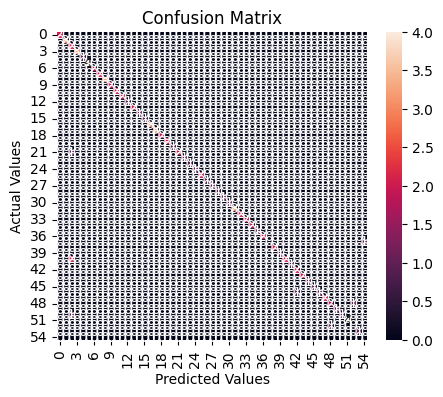

<Figure size 1600x1600 with 0 Axes>

In [228]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.figure(figsize=(16,16), dpi=100)
plt.show()

In [229]:
# FP = confusion_matrix.sum(axis=0) - np.diag(confusion_matrix)  
# FN = confusion_matrix.sum(axis=1) - np.diag(confusion_matrix)
# TP = np.diag(confusion_matrix)
# TN = confusion_matrix.values.sum() - (FP + FN + TP)

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP) 
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)

# # Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)


# for cls in range(CM.shape[0]):
#     print(f'[Class {cls} vs others]')
#     TP, FN, FP, TN = confusion_matrix_for(cls, CM).ravel()
#     print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')
#     # compute your metrics (your code in the question)
#     print()

In [230]:
def confusion_matrix_for(cls, cm):
    TP = cm[cls, cls]
    FN = cm[cls].sum() - TP
    FP = cm[:, cls].sum() - TP
    TN = cm.sum() - TP - FN - FP
    return np.array([[TP, FN], [FP, TN]])

for cls in range(ass1.shape[0]):
    print(f'[Class {cls} vs others]')
    TP, FN, FP, TN = confusion_matrix_for(cls, ass1).ravel()
    print(f'TP: {TP}, FN: {FN}, FP: {FP}, TN: {TN}')
    # compute your metrics (your code in the question)
    print()

[Class 0 vs others]
TP: 2, FN: 0, FP: 0, TN: 98

[Class 1 vs others]
TP: 3, FN: 0, FP: 0, TN: 97

[Class 2 vs others]
TP: 2, FN: 0, FP: 4, TN: 94

[Class 3 vs others]
TP: 3, FN: 0, FP: 0, TN: 97

[Class 4 vs others]
TP: 1, FN: 0, FP: 0, TN: 99

[Class 5 vs others]
TP: 4, FN: 0, FP: 0, TN: 96

[Class 6 vs others]
TP: 2, FN: 0, FP: 0, TN: 98

[Class 7 vs others]
TP: 2, FN: 0, FP: 0, TN: 98

[Class 8 vs others]
TP: 3, FN: 0, FP: 0, TN: 97

[Class 9 vs others]
TP: 2, FN: 0, FP: 0, TN: 98

[Class 10 vs others]
TP: 2, FN: 0, FP: 0, TN: 98

[Class 11 vs others]
TP: 2, FN: 0, FP: 0, TN: 98

[Class 12 vs others]
TP: 1, FN: 0, FP: 0, TN: 99

[Class 13 vs others]
TP: 2, FN: 0, FP: 0, TN: 98

[Class 14 vs others]
TP: 1, FN: 0, FP: 0, TN: 99

[Class 15 vs others]
TP: 1, FN: 0, FP: 0, TN: 99

[Class 16 vs others]
TP: 3, FN: 0, FP: 0, TN: 97

[Class 17 vs others]
TP: 3, FN: 0, FP: 0, TN: 97

[Class 18 vs others]
TP: 2, FN: 0, FP: 0, TN: 98

[Class 19 vs others]
TP: 2, FN: 0, FP: 0, TN: 98

[Class 20 

In [231]:
# FP = sum(ass1.sum(axis=0) - np.diag(ass1))
# FN = sum(ass1.sum(axis=1) - np.diag(ass1))
# TP = sum(np.diag(ass1))
# TN = ass1.sum()# - (FP+FN+TP)

FP = ass1.sum(axis=0) - np.diag(ass1) 
FN = ass1.sum(axis=1) - np.diag(ass1)
TP = np.diag(ass1)
TN = ass1.sum() - (FP + FN + TP)

print(sum(TP))
print(sum(TN))
print(sum(FP))
print(sum(FN))

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print('======')
print(TPR)
print(TNR)
print(PPV)
print(NPV)
print(FPR)
print(FNR)
print(FDR)

92
5392
8
8
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.66666667 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.         1.         1.         0.5        1.
 1.         1.         1.         1.         0.5        1.
 0.66666667 1.         0.5        1.         0.         1.
        nan]
[1.         1.         0.95918367 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.98979592 1.         1.      

C:\Users\ovisa\AppData\Local\Temp\ipykernel_16668\3258241693.py:17: RuntimeWarning: invalid value encountered in divide
  TPR = TP/(TP+FN)
C:\Users\ovisa\AppData\Local\Temp\ipykernel_16668\3258241693.py:21: RuntimeWarning: invalid value encountered in divide
  PPV = TP/(TP+FP)
C:\Users\ovisa\AppData\Local\Temp\ipykernel_16668\3258241693.py:27: RuntimeWarning: invalid value encountered in divide
  FNR = FN/(TP+FN)
C:\Users\ovisa\AppData\Local\Temp\ipykernel_16668\3258241693.py:29: RuntimeWarning: invalid value encountered in divide
  FDR = FP/(TP+FP)


In [232]:
from sklearn.metrics import precision_score
precision_score(ytest_arg, ypred_arg, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1.        , 1.        , 0.33333333, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 0.66666667, 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ])

In [233]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest_arg, ypred_arg)
# b= seed(a = accuracy_score(ytest_arg, ypred_arg))
# print(b)

0.92

In [234]:
from sklearn.metrics import recall_score
recall_score(ytest_arg, ypred_arg, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.66666667, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 1.        ,
       0.5       , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.5       , 1.        , 0.66666667, 1.        ,
       0.5       , 1.        , 0.        , 1.        , 0.        ])

In [235]:
from sklearn.metrics import classification_report
 
print(classification_report(ytest_arg, ypred_arg))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           4       0.33      1.00      0.50         2
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          19       1.00      1.00      1.00         3
          20       1.00    

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [236]:
from sklearn import metrics
ass1_display = metrics.ConfusionMatrixDisplay(confusion_matrix=ass1, display_labels=[False, True])



====================trial n error===================================================================================

In [237]:
#predict berdasarkan data pada x_test
x_pred = model.predict(x_test)

4/4 [==============================] - 0s 2ms/step


In [238]:
x_pred

array([[6.3650174e-07, 5.4447399e-05, 2.1483531e-08, ..., 3.1999093e-07,
        1.3229847e-07, 8.2282924e-07],
       [1.7331650e-02, 5.7654556e-02, 1.3255973e-02, ..., 1.6430652e-03,
        1.6715156e-02, 1.2380304e-03],
       [1.0830969e-04, 3.3131746e-05, 2.0482778e-07, ..., 1.5903124e-05,
        6.5597765e-06, 2.7656290e-06],
       ...,
       [8.2618484e-05, 1.3784975e-05, 8.4618259e-06, ..., 6.6064786e-07,
        2.3094824e-05, 4.9824678e-07],
       [2.3310323e-10, 1.9308146e-07, 6.4768564e-08, ..., 1.5739305e-04,
        6.3181432e-10, 9.3934693e-10],
       [6.8383832e-12, 2.4614044e-14, 7.0053921e-14, ..., 7.4222968e-13,
        8.7129236e-12, 1.0945447e-09]], dtype=float32)

In [239]:
#numpy argmax dengan axis1 pada data hasil prediction
x_predargmax = np.argmax(x_pred, axis= 1)
x_predargmax

array([44,  4, 38,  0, 57, 33, 41, 20, 31, 57, 48, 48, 62, 39, 45, 43, 12,
        7, 54,  9, 27, 15, 34,  4, 13, 30, 20, 38, 36,  2,  7, 19,  2, 13,
       49, 32, 21, 17, 26, 60, 22, 26, 28, 11, 56, 15, 41,  8, 19, 29, 45,
        5, 60, 21, 60, 37,  9,  4, 36, 43, 10, 23, 56, 35, 12, 59, 39, 22,
       30,  0, 16, 63, 55,  4, 19,  5,  7, 20, 10, 10,  8, 14, 48,  6, 49,
       58, 61,  2,  7, 60, 11,  4,  4, 37, 47, 52, 36,  5, 57, 40],
      dtype=int64)

In [240]:
#numpy argmax dengan axis1 pada data aslinya
x_truearg = np.argmax(x_test, axis= 1)
x_truearg

array([109,   0, 199, 208,  42,  45, 125, 243,  13,  42,  22,  23,   0,
        13, 180,  45, 259, 206,  14, 232,  97,  45, 189,   0, 171, 137,
       245, 200, 191, 195, 203, 213, 196, 172, 120,  42, 221, 256, 274,
         4, 201, 270, 224, 275,  13,  45, 125, 233, 214, 264, 181, 217,
         2, 222,   6, 246, 231, 193, 190,  45, 266, 109,  13, 251, 261,
       176,  13, 202,  13, 209, 262,  71,  28, 237, 216, 218, 205, 244,
       268, 269, 235, 187,  22, 240, 120, 152,  43, 197, 204,   6, 276,
         0,   0, 247,  13,  13, 192, 220,  42, 136], dtype=int64)

In [241]:
y

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [242]:
#cf disusun berdasarkan data asli dan dan data prediction
#kedua parameter jumlah labelnya harus sama
from sklearn.metrics import confusion_matrix
confusion_matrix(x_truearg, x_predargmax)

array([[0, 0, 4, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [243]:
ass = confusion_matrix(x_truearg, x_predargmax)

In [244]:
import pandas as pd

In [245]:
cm_df = pd.DataFrame(ass)

In [246]:
import matplotlib.pyplot as plt
import seaborn as sns

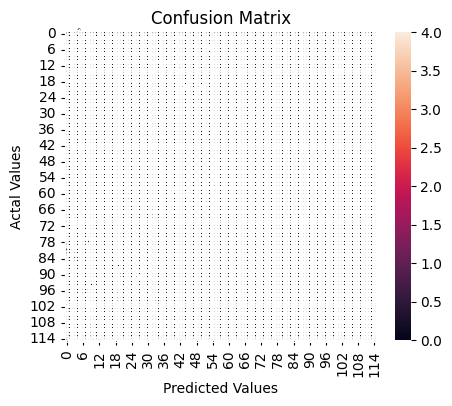

In [205]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [206]:
from sklearn.metrics import accuracy_score
accuracy_score(x_truearg, x_predargmax)

0.0

In [207]:
from sklearn.metrics import precision_score
precision_score(x_truearg, x_predargmax, average=None)

c:\Users\ovisa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])